# 🔧 Setup and Installation
Install required libraries and configure Kaggle access.

In [ ]:
!pip install -q kaggle
!pip install -q segmentation-models-pytorch
!pip install -q albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00


##Setting Up Kaggle API on Google Colab
As I am using Google Colab, I am using the following method to set up the Kaggle API and access datasets.

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification
!unzip -q ham1000-segmentation-and-classification.zip


Dataset URL: https://www.kaggle.com/datasets/surajghuwalewala/ham1000-segmentation-and-classification
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 2.57G/2.59G [00:35<00:00, 67.1MB/s]
100% 2.59G/2.59G [00:36<00:00, 77.2MB/s]


# Load and Explore Dataset
Reading the CSV, inspect the columns, and visualize images and masks.


In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading GroundTruth.csv
df = pd.read_csv('GroundTruth.csv')
print(f"Total records: {len(df)}")
df.head()

Total records: 10015


,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


####  Converting One-Hot Labels to Class Names

In [ ]:
# Getting class names from column headers
class_names = df.columns[1:]  # skip 'image'

# Converting one-hot to class label
df['label'] = df[class_names].idxmax(axis=1)

# Preview
df[['image', 'label']].head()


,image,label
0,ISIC_0024306,NV
1,ISIC_0024307,NV
2,ISIC_0024308,NV
3,ISIC_0024309,NV
4,ISIC_0024310,MEL


#### Visualization of One Image, Its Mask, and Classification Label

❌ Mask not found: masks/ISIC_0031081_mask.png


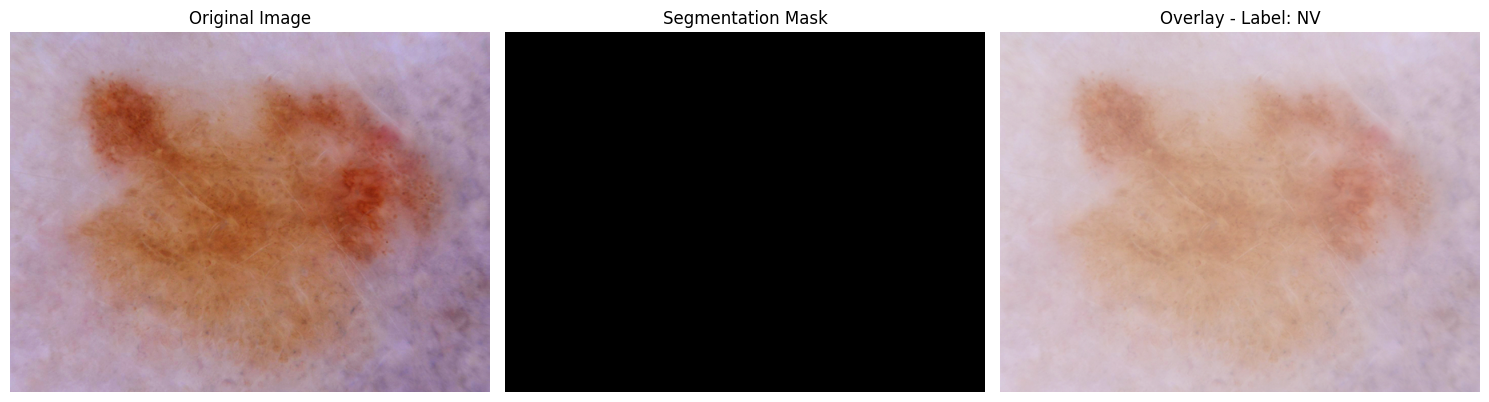

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def show_image_mask_label(image_id, label):
    img_path = f'images/{image_id}.jpg'
    mask_path = f'masks/{image_id}_mask.png'

    # Loading image
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Image not found: {img_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Loading mask
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is None:
        print(f"❌ Mask not found: {mask_path}")
        mask = np.zeros(img.shape[:2], dtype=np.uint8)  # empty mask as fallback

    # Plot
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(img)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title("Segmentation Mask")
    axs[1].axis('off')

    axs[2].imshow(img)
    axs[2].imshow(mask, cmap='Reds', alpha=0.4)
    axs[2].set_title(f"Overlay - Label: {label}")
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

# Picking a random sample and show
sample = df.sample(1).iloc[0]
show_image_mask_label(sample['image'], sample['label'])


# Data Preprocessing
#### Filtering valid samples with masks


In [ ]:
# Keeping only those rows where the mask image exists
def has_mask(image_id):
    return os.path.exists(f"masks/{image_id}_segmentation.png")

df['has_mask'] = df['image'].apply(has_mask)
print("Samples with masks:", df['has_mask'].sum())

# Saving filtered dataframe
df_seg = df[df['has_mask'] == True].reset_index(drop=True)
print("Images with masks:", len(df_seg))
df_clf = df.copy()  # all images can be used for classification

Samples with masks: 10015
Images with masks: 10015


Specifying Image Parameters

In [ ]:
IMAGE_SIZE = 224  # Resized input size for both classification and segmentation


#### Preprocessing Functions

Here, We’re defining image/mask loading + resizing for both tasks.

In [ ]:
from PIL import Image

# Classification loader
def load_classification_image(image_id):
    img_path = f"images/{image_id}.jpg"
    img = Image.open(img_path).resize((IMAGE_SIZE, IMAGE_SIZE))
    img = np.array(img) / 255.0  # Normalize
    return img

# Segmentation loader
def load_segmentation_data(image_id):
    img = load_classification_image(image_id)
    mask_path = f"masks/{image_id}_segmentation.png"
    mask = Image.open(mask_path).resize((IMAGE_SIZE, IMAGE_SIZE))
    mask = np.array(mask) / 255.0
    mask = (mask > 0.5).astype(np.uint8)
    return img, mask


In [ ]:
# Check how many mask files actually exist
mask_files = os.listdir("masks")
print(f"Total mask files found: {len(mask_files)}")
print("Example:", mask_files[:5])

Total mask files found: 10015
Example: ['ISIC_0034292_segmentation.png', 'ISIC_0026720_segmentation.png', 'ISIC_0029669_segmentation.png', 'ISIC_0024844_segmentation.png', 'ISIC_0028921_segmentation.png']


In [ ]:
df['image'].sample(5).tolist()

['ISIC_0030839',
 'ISIC_0025435',
 'ISIC_0030550',
 'ISIC_0033463',
 'ISIC_0031485']

## Sample Image + Mask Visualization


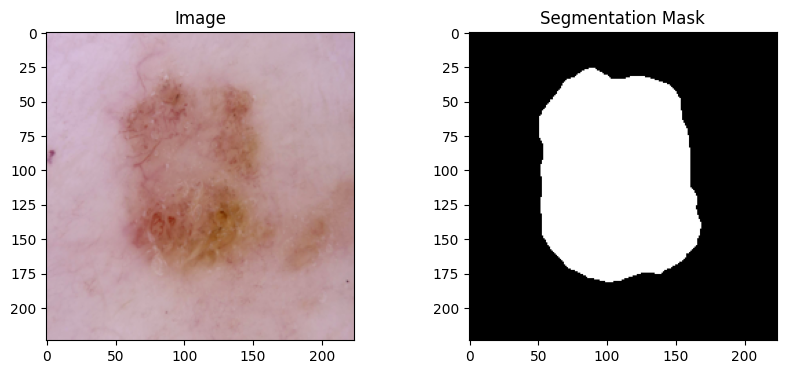

In [ ]:
sample_id = df_seg.sample(1).iloc[0]['image']
img, mask = load_segmentation_data(sample_id)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Segmentation Mask")
plt.show()


# Pytorch Dataset Classes for Training
Preparing PyTorch Dataset classes for segmentation and classification, then created train/val loaders.


#### Importing Required PyTorch Libraries

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms

#### Label Encoding for Classification

In [ ]:
# Creating a mapping: class name → index
class_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
class_to_idx = {name: idx for idx, name in enumerate(class_names)}

# Adding numeric label to dataframe
df['label_idx'] = df['label'].map(class_to_idx)

#### SegmentationDataset Class

In [ ]:
class SegmentationDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_id = row['image']
        img, mask = load_segmentation_data(image_id)  # numpy

        # Convert to tensors
        img = torch.tensor(img, dtype=torch.float).permute(2, 0, 1)  # HWC to CHW
        mask = torch.tensor(mask, dtype=torch.float).unsqueeze(0)    # Adding channel dim

        return img, mask


#### ClassificationDataset Class

In [ ]:
class ClassificationDataset(Dataset):
    def __init__(self, dataframe):
        self.df = dataframe

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_id = row['image']
        img = load_classification_image(image_id)  # numpy

        img = torch.tensor(img, dtype=torch.float).permute(2, 0, 1)  # HWC to CHW
        label = torch.tensor(row['label_idx'], dtype=torch.long)

        return img, label

#### Testing the dataset

In [ ]:
# Instantiate datasets
seg_dataset = SegmentationDataset(df_seg)
clf_dataset = ClassificationDataset(df)

# Testing with one sample
img, mask = seg_dataset[0]
print("Segmentation image shape:", img.shape)
print("Segmentation mask shape:", mask.shape)

img, label = clf_dataset[0]
print("Classification image shape:", img.shape)
print("Label:", label)


Segmentation image shape: torch.Size([3, 224, 224])
Segmentation mask shape: torch.Size([1, 224, 224])
Classification image shape: torch.Size([3, 224, 224])
Label: tensor(1)


# Building DataLoaders & Defining Model Architectures

PyTorch DataLoaders help us efficiently feed batches of data to the model during training.

#### Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

# Segmentation: using only those with masks
df_seg_train, df_seg_val = train_test_split(df_seg, test_size=0.2, random_state=42)

# Classification: all images can be used
df_clf_train, df_clf_val = train_test_split(df, test_size=0.2, random_state=42)

#### Creating DataLoaders

In [ ]:
from torch.utils.data import DataLoader

# Parameters
BATCH_SIZE = 16
NUM_WORKERS = 2  # Set to 0 if you get issues on Colab

# Segmentation
train_seg_loader = DataLoader(SegmentationDataset(df_seg_train), batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_seg_loader = DataLoader(SegmentationDataset(df_seg_val), batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

# Classification
train_clf_loader = DataLoader(ClassificationDataset(df_clf_train), batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_clf_loader = DataLoader(ClassificationDataset(df_clf_val), batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

####  Test a Batch

In [ ]:
# Check segmentation batch
x_seg, y_seg = next(iter(train_seg_loader))
print("Segmentation batch:", x_seg.shape, y_seg.shape)

# Check classification batch
x_clf, y_clf = next(iter(train_clf_loader))
print("Classification batch:", x_clf.shape, y_clf.shape)

Segmentation batch: torch.Size([16, 3, 224, 224]) torch.Size([16, 1, 224, 224])
Classification batch: torch.Size([16, 3, 224, 224]) torch.Size([16])


# Build a Multitask Deep Learning Model

 Now I am building the multitask model in a simple and clean way, step-by-step.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

#### Defining Multitask Model
Shared ResNet18 encoder with a UNet-style segmentation decoder and classification head.

In [ ]:
class MultiTaskModel(nn.Module):
    def __init__(self, n_classes=7):  # 7 cancer types
        super(MultiTaskModel, self).__init__()

        # Shared Encoder: Pretrained ResNet18
        resnet = models.resnet18(pretrained=True)
        self.encoder = nn.Sequential(*list(resnet.children())[:-2])  # remov avgpool & fc

        encoder_channels = 512  # ResNet18 last feature map channels

        # Segmentation Decoder (Upsampling)
        self.seg_decoder = nn.Sequential(
            nn.ConvTranspose2d(encoder_channels, 256, kernel_size=2, stride=2),  # 7 → 14
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),  # 14 → 28
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),   # 28 → 56
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),    # 56 → 112
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2),    # 112 → 224
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=1),
            nn.Sigmoid()
        )

        # Classification Head
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),  # From [B, C, H, W] to [B, C, 1, 1]
            nn.Flatten(),  # → [B, C]
            nn.Linear(encoder_channels, 128),
            nn.ReLU(),
            nn.Linear(128, n_classes)
        )

    def forward(self, x):
        shared = self.encoder(x)

        # Segmentation output
        seg_output = self.seg_decoder(shared)

        # Classification output
        class_output = self.classifier(shared)

        return seg_output, class_output


#### Testing the Model Shape

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiTaskModel().to(device)

# Test shape with dummy batch
x = torch.randn(4, 3, 224, 224).to(device)
seg_out, class_out = model(x)

print("Segmentation output:", seg_out.shape)   # [4, 1, 224, 224]
print("Classification output:", class_out.shape)  # [4, 7]

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 114MB/s]


Segmentation output: torch.Size([4, 1, 224, 224])
Classification output: torch.Size([4, 7])


# Loss Functions, Optimizer & Training Loop

# Defining Loss Functions

In [ ]:
# For segmentation (binary mask)
segmentation_loss_fn = nn.BCELoss()  # Or DiceLoss

# For classification (multi-class)
classification_loss_fn = nn.CrossEntropyLoss()

NameError: name 'nn' is not defined

Combine Both Losses

In [ ]:
def multitask_loss(seg_pred, seg_true, cls_pred, cls_true, alpha=1.0, beta=1.0):
    loss_seg = segmentation_loss_fn(seg_pred, seg_true)
    loss_cls = classification_loss_fn(cls_pred, cls_true)
    return alpha * loss_seg + beta * loss_cls, loss_seg, loss_cls

Set Optimizer

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

Basic Training Loop (just 1 epoch)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.train()

for images_seg, masks_seg in train_seg_loader:
    images_seg, masks_seg = images_seg.to(device), masks_seg.to(device)

    # Sample from classification loader (sync later)
    images_cls, labels_cls = next(iter(train_clf_loader))
    images_cls, labels_cls = images_cls.to(device), labels_cls.to(device)

    # Forward pass (using segmentation images only for both heads)
    seg_out, cls_out = model(images_seg)

    # Compute loss
    loss, loss_seg, loss_cls = multitask_loss(seg_out, masks_seg, cls_out, labels_cls)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Loss: {loss.item():.4f} | Seg Loss: {loss_seg.item():.4f} | Cls Loss: {loss_cls.item():.4f}")
    break  # Remove this later to train full epoch


Loss: 2.4831 | Seg Loss: 0.6768 | Cls Loss: 1.8063


# Full Training Loop with Validation, Metrics, and Checkpointing


#### Defining Metrics
Dice Score (for segmentation):

In [ ]:
def dice_score(preds, targets, threshold=0.5):
    preds = (preds > threshold).float()
    smooth = 1e-5
    intersection = (preds * targets).sum(dim=(1,2,3))
    union = preds.sum(dim=(1,2,3)) + targets.sum(dim=(1,2,3))
    dice = (2.0 * intersection + smooth) / (union + smooth)
    return dice.mean().item()


Accuracy (for classification):

In [ ]:
def accuracy(preds, labels):
    preds = torch.argmax(preds, dim=1)
    correct = (preds == labels).sum().item()
    return correct / len(labels)


#### Complete Training + Validation Loop
For multi-epoch training:

In [ ]:
import time

def train_multitask(model, train_seg_loader, val_seg_loader, train_clf_loader, val_clf_loader,
                    epochs=5, alpha=1.0, beta=1.0):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    best_val_loss = float('inf')

    # Tracking history for plotting
    history = {
        'train_loss': [], 'val_loss': [],
        'train_dice': [], 'val_dice': [],
        'train_acc': [], 'val_acc': []
    }

    for epoch in range(epochs):
        model.train()
        train_loss, train_dice, train_acc = 0, 0, 0
        start_time = time.time()
        clf_iter = iter(train_clf_loader)

        for images_seg, masks_seg in train_seg_loader:
            images_seg, masks_seg = images_seg.to(device), masks_seg.to(device)

            try:
                images_cls, labels_cls = next(clf_iter)
            except:
                clf_iter = iter(train_clf_loader)
                images_cls, labels_cls = next(clf_iter)

            if images_cls.shape[0] != images_seg.shape[0]:
                images_cls, labels_cls = images_cls[:images_seg.shape[0]], labels_cls[:images_seg.shape[0]]

            images_cls, labels_cls = images_cls.to(device), labels_cls.to(device)

            seg_out, cls_out = model(images_seg)
            loss, loss_seg, loss_cls = multitask_loss(seg_out, masks_seg, cls_out, labels_cls, alpha, beta)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_dice += dice_score(seg_out, masks_seg)
            train_acc += accuracy(cls_out, labels_cls)

        n_batches = len(train_seg_loader)
        avg_train_loss = train_loss / n_batches
        avg_train_dice = train_dice / n_batches
        avg_train_acc = train_acc / n_batches

        print(f"\nEpoch {epoch+1}/{epochs}")
        print(f"Train Loss: {avg_train_loss:.4f} | Dice: {avg_train_dice:.4f} | Accuracy: {avg_train_acc:.4f}")

        # --- Validation ---
        model.eval()
        val_loss, val_dice, val_acc = 0, 0, 0
        val_clf_iter = iter(val_clf_loader)

        with torch.no_grad():
            for images_seg, masks_seg in val_seg_loader:
                images_seg, masks_seg = images_seg.to(device), masks_seg.to(device)

                try:
                    images_cls, labels_cls = next(val_clf_iter)
                except:
                    val_clf_iter = iter(val_clf_loader)
                    images_cls, labels_cls = next(val_clf_iter)

                if images_cls.shape[0] != images_seg.shape[0]:
                    images_cls, labels_cls = images_cls[:images_seg.shape[0]], labels_cls[:images_seg.shape[0]]

                images_cls, labels_cls = images_cls.to(device), labels_cls.to(device)

                seg_out, cls_out = model(images_seg)
                loss, loss_seg, loss_cls = multitask_loss(seg_out, masks_seg, cls_out, labels_cls, alpha, beta)

                val_loss += loss.item()
                val_dice += dice_score(seg_out, masks_seg)
                val_acc += accuracy(cls_out, labels_cls)

        n_val_batches = len(val_seg_loader)
        avg_val_loss = val_loss / n_val_batches
        avg_val_dice = val_dice / n_val_batches
        avg_val_acc = val_acc / n_val_batches

        print(f"Val Loss: {avg_val_loss:.4f} | Dice: {avg_val_dice:.4f} | Accuracy: {avg_val_acc:.4f}")

        # --- Save Best Model ---
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_multitask_model.pt')
            print("Saved best model.")

        # --- Save metrics to history ---
        history['train_loss'].append(avg_train_loss)
        history['train_dice'].append(avg_train_dice)
        history['train_acc'].append(avg_train_acc)

        history['val_loss'].append(avg_val_loss)
        history['val_dice'].append(avg_val_dice)
        history['val_acc'].append(avg_val_acc)

        print(f"Time: {time.time() - start_time:.2f}s")

    return history  # So you can plot curves later


#### Run

In [ ]:
history = train_multitask(model, train_seg_loader, val_seg_loader, train_clf_loader, val_clf_loader, epochs=5)


Epoch 1/5
Train Loss: 1.5991 | Dice: 0.2394 | Accuracy: 0.6690
Val Loss: 1.4234 | Dice: 0.8160 | Accuracy: 0.6658
✅ Saved best model.
⏱ Time: 3123.49s

Epoch 2/5
Train Loss: 1.4025 | Dice: 0.8357 | Accuracy: 0.6700
Val Loss: 1.4119 | Dice: 0.8602 | Accuracy: 0.6658
✅ Saved best model.
⏱ Time: 3112.29s

Epoch 3/5
Train Loss: 1.3803 | Dice: 0.8618 | Accuracy: 0.6698
Val Loss: 1.3932 | Dice: 0.8686 | Accuracy: 0.6658
✅ Saved best model.
⏱ Time: 3081.88s

Epoch 4/5
Train Loss: 1.3630 | Dice: 0.8765 | Accuracy: 0.6698
Val Loss: 1.4025 | Dice: 0.8726 | Accuracy: 0.6658
⏱ Time: 3086.65s

Epoch 5/5
Train Loss: 1.3451 | Dice: 0.8838 | Accuracy: 0.6698
Val Loss: 1.3954 | Dice: 0.8745 | Accuracy: 0.6658
⏱ Time: 3077.09s


# Visualize Predictions (Multitask Output)

#### Loading the Best Model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MultiTaskModel()
model.load_state_dict(torch.load("best_multitask_model.pt", map_location=device))
model.to(device)
model.eval()

MultiTaskModel(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

#### Inference on a Random Validation Sample



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Label map for decoding
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

def visualize_prediction(idx=None):
    if idx is None:
        sample = df_seg.sample(1).iloc[0]
    else:
        sample = df_seg.iloc[idx]

    image_id = sample['image']
    true_label = sample['label']

    # Loading image and mask
    img_tensor, true_mask = load_segmentation_data(image_id)
    img_tensor = torch.tensor(img_tensor).permute(2, 0, 1).unsqueeze(0).float().to(device)

    # model run
    with torch.no_grad():
        pred_mask, pred_logits = model(img_tensor)

    pred_mask = pred_mask.squeeze().cpu().numpy()
    pred_mask = (pred_mask > 0.5).astype(np.uint8)

    pred_class_idx = torch.argmax(pred_logits, dim=1).item()
    pred_class = idx_to_class[pred_class_idx]

    # Loading original image for display
    img_vis = load_classification_image(image_id)

    # Plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_vis)
    plt.title(f"Original Image\nTrue Class: {true_label}")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(pred_mask, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(img_vis)
    plt.imshow(pred_mask, cmap='Reds', alpha=0.4)
    plt.title(f"Overlay\nPredicted Class: {pred_class}")
    plt.axis("off")

    plt.tight_layout()
    plt.show()



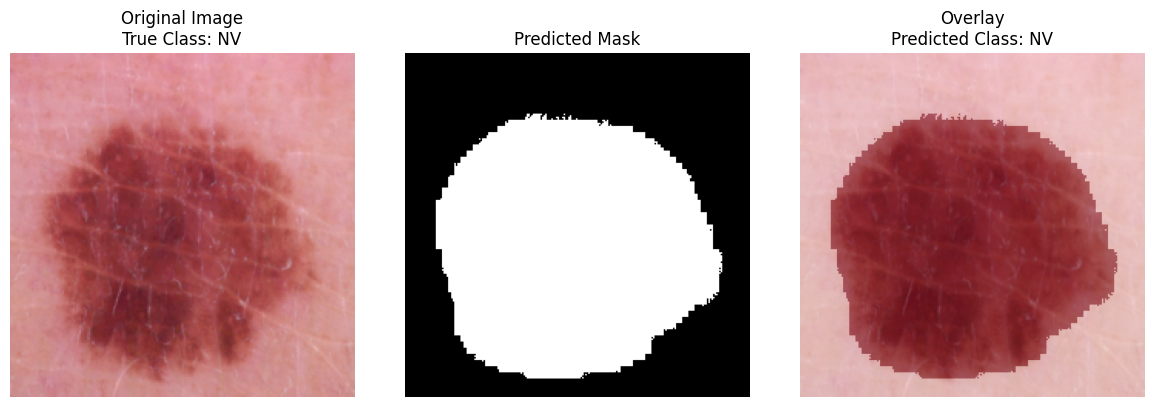

In [ ]:
visualize_prediction()  # show random prediction


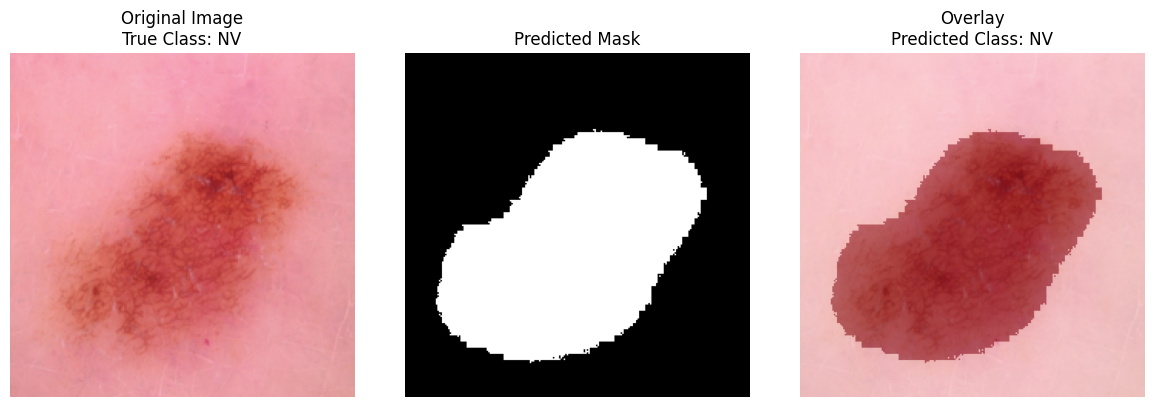

In [ ]:
visualize_prediction(idx=5)  # show specific index


#  Training Curves Plot

In [ ]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(16, 5))

    plt.subplot(1, 3, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(epochs, history['train_dice'], label='Train Dice')
    plt.plot(epochs, history['val_dice'], label='Val Dice')
    plt.title('Dice Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(epochs, history['train_acc'], label='Train Acc')
    plt.plot(epochs, history['val_acc'], label='Val Acc')
    plt.title('Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


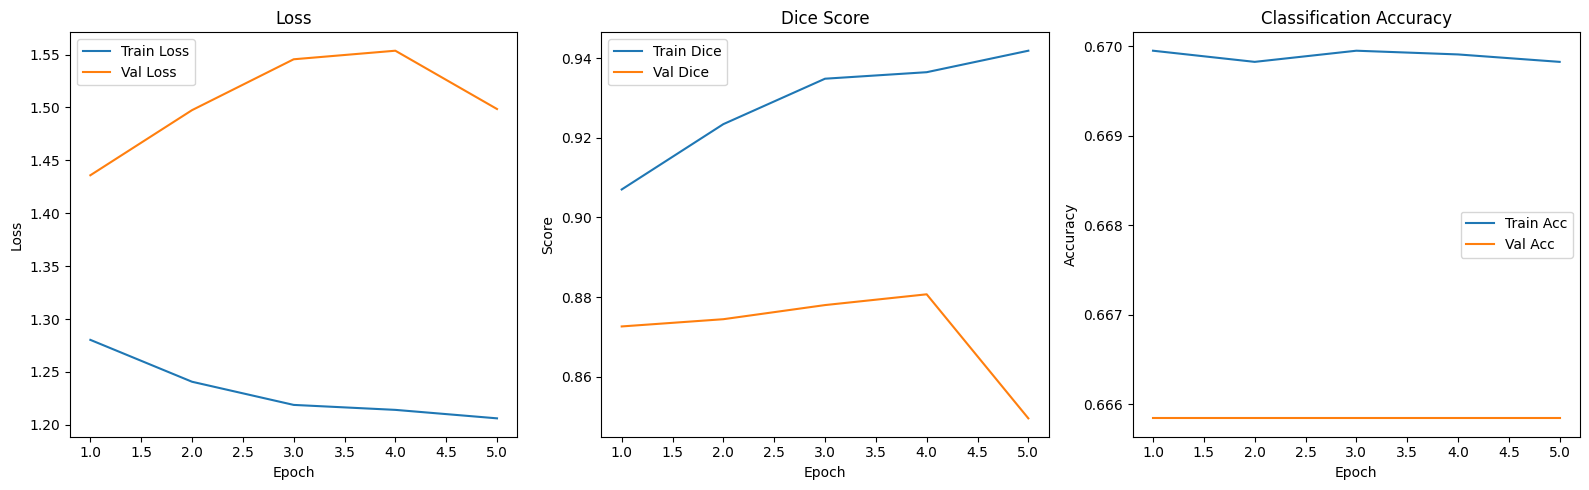

In [ ]:
plot_training_curves(history)
